# Летний ЦЕХ Росатома. Роевая робототехника

Выполнила: Боброва Алла

В исходный код добавила отображение стартовой и конечной точек, адаптировала отображение анимации для Jupiter Notebook

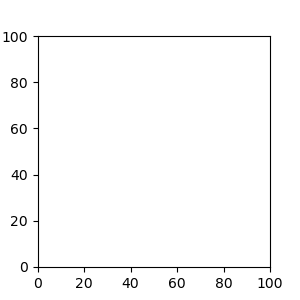

In [70]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib widget

class Point:

    epsilon = 0.00001  # очень маленькое число, используемое для избежания деления на ноль
    step = 0.1         # шаг движения робота

    def __init__(self):  # инициализирует объект
        self.alfa = 0  # начальный угол азимута
        # робот появляется в случайном месте на плоскости
        # и хочет попасть в точку rally_point, которая тоже появляется на плоскости случайным образом
        self.x, self.y = random.random() * 100, random.random() * 100  # начальные координаты робота
        self.rally_point = np.array([random.random() * 100, random.random() * 100])

    def azimuth_calculation(self):      # вычисление азимута целевой точки относительно текущих координат робота
        target_x = self.rally_point[0]  # координаты целевой точки
        target_y = self.rally_point[1]  # координаты целевой точки
        k = (self.y - target_y) / ((self.x - target_x) + self.epsilon) 
        # k - тангенс угла наклона линии, соединяющей текущую позицию и целевую точку. 
        # Добавлено epsilon для предотвращения деления на ноль
        self.alfa = math.atan(k)
        # Корректировка угла в зависимости от положения целевой точки и знака k. 
        # Это позволяет учесть разные квадранты.
        if self.x < target_x:
            self.alfa += math.pi
        elif k < 0:
            self.alfa += 2 * math.pi

    def moving(self):
        target_x = self.rally_point[0]
        target_y = self.rally_point[1]

        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        # добавьте в эту часть кода кинематических ограничений, чтобы сделать движение неголономным
        d = ((self.x - target_x) ** 2 + (self.y - target_y) ** 2) ** 0.5
        if abs(d) > 0.5:
            self.azimuth_calculation()
            self.x += self.step * np.cos(self.alfa) * np.sign(-d) * math.atan(d)
            self.y += self.step * np.sin(self.alfa) * np.sign(-d) * math.atan(d)
        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

def init():
    # Отрисовка начальной и конечной точек
    start_point.set_data([robot.x], [robot.y])
    end_point.set_data([robot.rally_point[0]], [robot.rally_point[1]])
    line.set_data([], [])
    return line, start_point, end_point

def simulate(i):
    robot.moving()
    x.append(robot.x)
    y.append(robot.y)
    line.set_data(x, y)
    return line,

if __name__ == '__main__':

    robot = Point()  # Инициализация мобильного робота на плоскости

    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # Отрисовка движения робота
    x = [robot.x]  # Сохранение начальной позиции робота
    y = [robot.y]

    fig = plt.figure(figsize=(3, 3))
    ax = plt.axes(xlim=(0, 100), ylim=(0, 100))

    # Линия для траектории робота
    line, = ax.plot([], [], 'b-', lw=2)

    # Отрисовка начальной и конечной точек
    start_point, = ax.plot([], [], 'go', ms=10)  # Начальная точка — зеленая
    end_point, = ax.plot([], [], 'ro', ms=10)    # Конечная точка — красная

    anim = FuncAnimation(fig, simulate, init_func=init, frames=1000, interval=1, blit=True, repeat=False)
    plt.show()
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Часть 1. Добавление кинематических условий

**Постановка задачи:**

На ровную поверхность был спущен мобильный робот с рулевым приводом с Аккермана. Координаты приземления робота на поверхность и точка в которую ему нужно добраться задаются случайным образом. Будем считать, что колеса не поворачиваются на угол больше 45 градусов. В каждую сторону.

**Основная задача:** определить возможно ли попасть из точки старта в точку интереса, если допускается единожды повернуть руль и больше с ним не взаимодействовать. Требуется доказательство. В случае если это возможно вывести движение робота на экран и угол на которой необходимо повернуть колеса.

Цель достижима. Угол: -15.19555 градусов


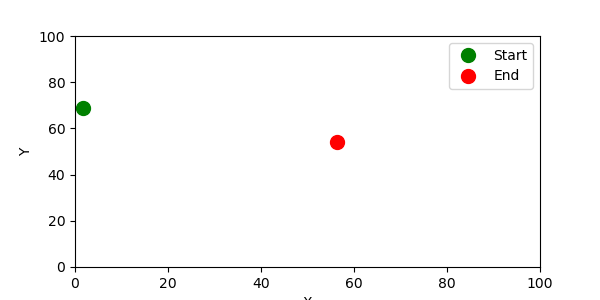

In [60]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib widget

class Point:
    
    max_steering_angle = math.radians(45)  # Максимальный угол поворота рулевого управления
    epsilon = 0.00001  # Очень маленькое число, используемое для избежания деления на ноль
    step = 0.1         # Шаг движения робота

    def __init__(self): # Инициализация объекта
        self.alfa = 0   # Начальный угол азимута
        self.x, self.y = random.random() * 100, random.random() * 100  # Начальные координаты робота
        self.rally_point = np.array([random.random() * 100, random.random() * 100])
        self.flag = False  # Флаг для проверки возможности достижения цели

    def azimuth_calculation(self):  # Вычисление азимута целевой точки относительно текущих координат робота
        target_x = self.rally_point[0]
        target_y = self.rally_point[1]
        delta_x = target_x - self.x
        delta_y = target_y - self.y
        self.alfa = math.atan2(delta_y, delta_x)

    def moving(self):
        self.azimuth_calculation()  # Вычисляем азимут перед проверкой
        # Проверяем, может ли это направление быть достигнуто с учетом ограничения ±45 градусов
        if abs(self.alfa) <= self.max_steering_angle:
            self.flag = True
        else:
            self.flag = False

def init():
    # Отрисовка начальной и конечной точек
    start_point.set_data([robot.x], [robot.y])
    end_point.set_data([robot.rally_point[0]], [robot.rally_point[1]])
    line.set_data([], [])
    return line, start_point, end_point

def simulate(i):
    if robot.flag:  # Обновляем только если движение возможно
        d = ((robot.x - robot.rally_point[0]) ** 2 + (robot.y - robot.rally_point[1]) ** 2) ** 0.5
        if abs(d) > 0.5:
            robot.x += robot.step * np.cos(robot.alfa)
            robot.y += robot.step * np.sin(robot.alfa)
            x.append(robot.x)
            y.append(robot.y)
            line.set_data(x, y)
    return line,

if __name__ == '__main__':

    robot = Point()
    robot.moving()  # Проверка возможности достижения цели

    if robot.flag:
        print(f'Цель достижима. Угол: {np.round(math.degrees(robot.alfa),5)} градусов')
        x = [robot.x]  # Сохранение начальной позиции робота
        y = [robot.y]

        fig = plt.figure(figsize=(6, 3))
        ax = plt.axes(xlim=(0, 100), ylim=(0, 100))

        # Линия для траектории робота
        line, = ax.plot([], [], 'b-', lw=2)

        # Отрисовка начальной и конечной точек
        start_point, = ax.plot([robot.x], [robot.y], 'go', ms=10, label='Start')                        # Начальная точка — зеленая
        end_point, = ax.plot([robot.rally_point[0]], [robot.rally_point[1]], 'ro', ms=10, label='End')  # Конечная точка — красная

        # Настройки графика
        ax.legend()
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()

        anim = FuncAnimation(fig, simulate, init_func=init, frames=1000, interval=10, blit=True, repeat=False)
        plt.show()
    else:
        print('Невозможно достичь цели')



# Часть 2

**Задание:**

Робот движется с постоянной скоростью, попробуйте задать ему произвольную траекторию. Условно, появляемся в центре поля, и едем по квадрату. Исказите скорость и поворот, чтобы на каждом шаге она зашумлялась белым или гаусовским шумом

Чтобы было нагляднее лучше не использовать вывод в режиме реального времени. Выведете один кадр, с отображением всех возможных точек во время движения, в которые мог оказаться робот. Т.к. их  бесконечно, давайте будем выводить по 10 значений после каждого маневра

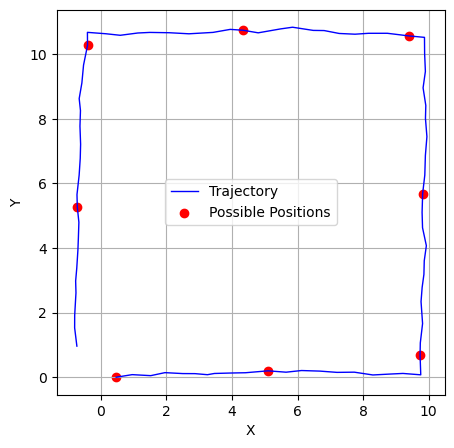

In [43]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

class Point:
    # Максимальный угол поворота рулевого управления
    max_steering_angle = math.radians(45)
    epsilon = 0.00001   # Очень маленькое число, используемое для избежания деления на ноль
    base_step = 0.5     # Базовый шаг движения робота
    noise_stddev = 0.1  # Стандартное отклонение шума для скорости и угла

    def __init__(self):
        self.x, self.y = 0, 0   # Начальные координаты робота (в центре)
        self.angle = 0          # Начальный угол
        self.path = []          # Список для хранения траектории
        self.noise = np.random.default_rng()  # Генератор случайных чисел для шума

    def move(self, step, angle):
        noise_step = step + self.noise.normal(0, self.noise_stddev)
        noise_angle = angle + self.noise.normal(0, self.noise_stddev)
        self.x += noise_step * np.cos(noise_angle)
        self.y += noise_step * np.sin(noise_angle)
        self.path.append((self.x, self.y))

    def follow_square_trajectory(self, side_length, steps_per_side):
        # Двигаемся по квадрату
        for _ in range(4):              # 4 стороны квадрата
            for _ in range(steps_per_side):
                self.move(self.base_step, self.angle)
            self.angle += math.pi / 2   # Поворот на 90 градусов


def plot_trajectory_and_positions(trajectory, step_positions):
    plt.figure(figsize=(5, 5))
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1],
             'b-', lw=1, label='Trajectory')
    plt.scatter(*zip(*step_positions), color='r', label='Possible Positions')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == '__main__':
    side_length = 5             # Длина стороны квадрата
    steps_per_side = 20         # Количество шагов на каждую сторону квадрата

    robot = Point()
    robot.follow_square_trajectory(side_length, steps_per_side)

    # Пример вывода всех возможных точек
    # Здесь мы берем по 10 точек после каждого маневра
    step_positions = robot.path[::10]

    plot_trajectory_and_positions(robot.path, step_positions)

## + фильр Калмана

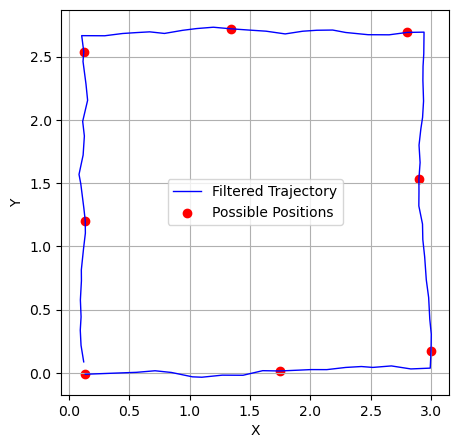

In [57]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Класс фильтра Калмана
class KalmanFilter:
    def __init__(self, process_variance, measurement_variance):
        self.process_variance = process_variance
        self.measurement_variance = measurement_variance
        self.estimate = 0
        self.estimate_covariance = 1

    def update(self, measurement):
        # Prediction update
        self.estimate_covariance += self.process_variance

        # Measurement update
        kalman_gain = self.estimate_covariance / \
            (self.estimate_covariance + self.measurement_variance)
        self.estimate += kalman_gain * (measurement - self.estimate)
        self.estimate_covariance *= (1 - kalman_gain)
        return self.estimate


# Класс для управления движением и фильтрации
class Point:
    max_steering_angle = math.radians(45)  # Максимальный угол поворота
    base_step = 0.5     # Базовый шаг движения
    noise_stddev = 0.1  # Стандартное отклонение шума

    def __init__(self):
        self.x, self.y = 0, 0   # Начальная позиция
        self.angle = 0          # Начальный угол
        self.path = []          # Хранение траектории
        self.noise = np.random.default_rng()    # Генератор случайных чисел
        self.kf_x = KalmanFilter(0.1, 1.0)      # Фильтр Калмана для x
        self.kf_y = KalmanFilter(0.1, 1.0)      # Фильтр Калмана для y

    def move(self, step, angle):
        noise_step = step + self.noise.normal(0, self.noise_stddev)
        noise_angle = angle + self.noise.normal(0, self.noise_stddev)
        x_new = self.x + noise_step * np.cos(noise_angle)
        y_new = self.y + noise_step * np.sin(noise_angle)

        # Обновление состояния фильтром Калмана
        self.x = self.kf_x.update(x_new)
        self.y = self.kf_y.update(y_new)

        self.path.append((self.x, self.y))

    def follow_square_trajectory(self, side_length, steps_per_side):
        for _ in range(4):              # 4 стороны квадрата
            for _ in range(steps_per_side):
                self.move(self.base_step, self.angle)
            self.angle += math.pi / 2   # Поворот на 90 градусов


def plot_trajectory_and_positions(trajectory, step_positions):
    plt.figure(figsize=(5, 5))
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1],
             'b-', lw=1, label='Filtered Trajectory')
    plt.scatter(*zip(*step_positions), color='r', label='Possible Positions')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == '__main__':
    side_length = 5         # Длина стороны квадрата
    steps_per_side = 20     # Количество шагов на каждую сторону квадрата

    robot = Point()
    robot.follow_square_trajectory(side_length, steps_per_side)

    # Пример вывода всех возможных точек
    # Здесь мы берем по 10 точек после каждого маневра
    step_positions = robot.path[::10]

    plot_trajectory_and_positions(robot.path, step_positions)

#### Пример, когда применение фильтра Калмана заметно улучшает:

Было

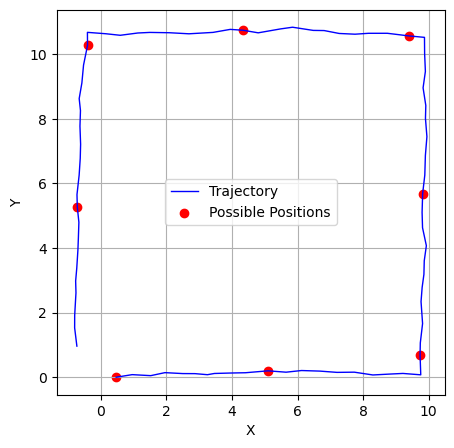

Стало

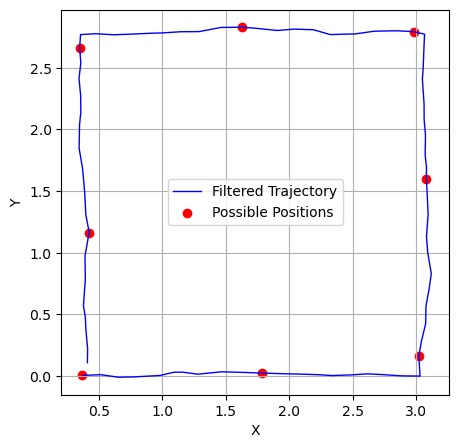